# Check the separation of features using SVM

In [1]:
%matplotlib inline
import pandas as pd

import numpy as np

from scipy import stats

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear')

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
def chk_features(data_func):
    
    get_data = data_func
    #fig = plt.figure(figsize=(10, 10))
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    def plot_(X, y, labels, ax, gender):
        ax.plot(X[labels == "Desc" ,0], X[labels == "Desc" ,1], '.r', markersize=10, label='Desc')    
        ax.plot(X[labels == "Pred" ,0], X[labels == "Pred" ,1], '.b', markersize=10, label='Pred') 
        ax.plot(X[labels == "Rapt" ,0], X[labels == "Rapt" ,1], '.g', markersize=10, label='Rapt')    

        ax.set_title(gender, fontsize=30)
        ax.set_xlabel('C1', fontsize=25)
        ax.set_ylabel('C2', fontsize=25)
        ax.legend(fontsize=25)

    
    X, y, labels  = get_data("all")
    plot_(X, y, labels, ax, "all")



# TripletLoss features

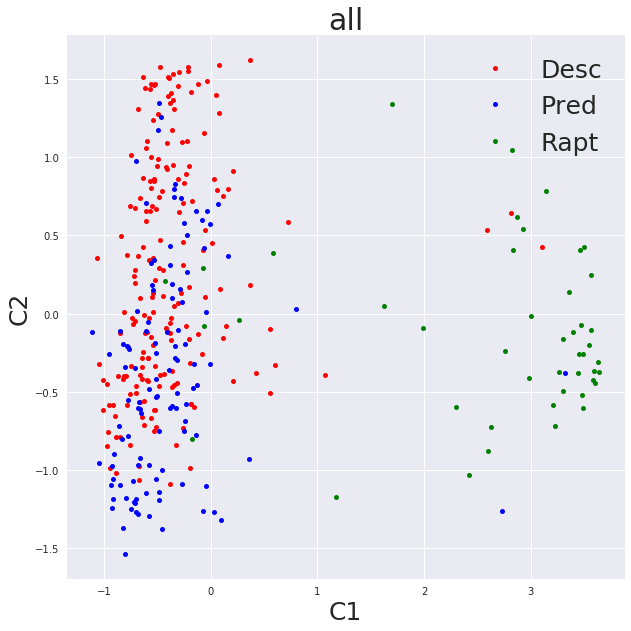

In [3]:
def read_csv(data_file):                                         
    labels_from_csv = []                                         
    features_from_csv = []                                       
    with open(data_file, 'r') as dfile:                          
        for line in dfile.readlines():                           
            row = line.strip().split(',')                        
            labels_from_csv.append(row[0])                       
            features_from_csv.append([float(x) for x in row[1:]])
    return features_from_csv, labels_from_csv                    


def get_data(gender):
    
    # the first two calls
    features, labels = read_csv("{}_tripletloss.csv".format(gender))
    features = np.array(features)
    labels = np.array(labels)
    
    #X = features
    X = PCA(n_components=2).fit_transform(features)
    y = LabelEncoder().fit(labels).transform(labels)
        
    return X, y, labels
    
chk_features(get_data)
